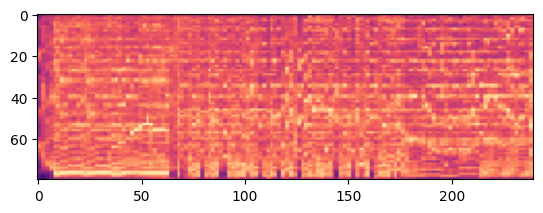

(80, 240, 4)

In [29]:
import matplotlib.pyplot as plt
from matplotlib.image import imread,imsave
from tensorflow.keras.preprocessing.image import img_to_array
img = imread("../music/ARASHI/image_data/ARASHI - ｢未完｣ [Official Music Video]_01.png")
plt.imshow(img,)
plt.show()
array = img_to_array(img)
array.shape

試行2　flow_from_directory を用いていることは試行１と変わらない。バッチサイズを大きくし、エポックを増やした。→　バッチサイズが大きすぎて、メモリ不足で落ちた

尚、入力データは、各クラス内の要素数が等しくなるように調節している。

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import utils
utils.set_random_seed(0)

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255,validation_split=0.25)

train_generator = datagen.flow_from_directory(
        'train',
        subset='training',
        target_size=(80, 240),
        batch_size=128,
        class_mode='categorical'
        )

val_generator = datagen.flow_from_directory(
        'train',
        subset='validation',
        target_size=(80, 240),
        batch_size=128,
        class_mode='categorical'
        )

test_generator = datagen.flow_from_directory(
        'test',
        target_size=(80, 240),
        batch_size=128,
        class_mode='categorical'
        )

Found 480 images belonging to 8 classes.
Found 160 images belonging to 8 classes.
Found 216 images belonging to 8 classes.


In [11]:
train_generator.class_indices

{'ARASHI': 0,
 'MRCHILDREN': 1,
 'NAGABUCHI': 2,
 'SOUTHEN': 3,
 'SPITZ': 4,
 'TANIMURA': 5,
 'YONE': 6,
 'YUZU': 7}

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
# モデル定義
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(80, 240, 3)))
model.add(MaxPooling2D(pool_size=(5, 3)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 3)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 76, 236, 32)       2432      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 78, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 74, 32)        25632     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 2, 24, 32)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1536)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1536)             

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [14]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100
)

Epoch 1/100


2025-02-05 06:13:04.024307: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 672.84MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-02-05 06:13:04.054617: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 53.59MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


4/4 [==============================] - 3s 384ms/step - loss: 2.0870 - accuracy: 0.1375 - val_loss: 2.0764 - val_accuracy: 0.1312
Epoch 2/100
4/4 [==============================] - 1s 129ms/step - loss: 2.0807 - accuracy: 0.1542 - val_loss: 2.0710 - val_accuracy: 0.2000
Epoch 3/100
4/4 [==============================] - 1s 130ms/step - loss: 2.0655 - accuracy: 0.1729 - val_loss: 2.0547 - val_accuracy: 0.1625
Epoch 4/100
4/4 [==============================] - 1s 136ms/step - loss: 2.0387 - accuracy: 0.1854 - val_loss: 2.0252 - val_accuracy: 0.2188
Epoch 5/100
4/4 [==============================] - 1s 119ms/step - loss: 1.9861 - accuracy: 0.2125 - val_loss: 1.9824 - val_accuracy: 0.1875
Epoch 6/100
4/4 [==============================] - 1s 139ms/step - loss: 1.9685 - accuracy: 0.1875 - val_loss: 1.9729 - val_accuracy: 0.1937
Epoch 7/100
4/4 [==============================] - 1s 131ms/step - loss: 1.9278 - accuracy: 0.2146 - val_loss: 1.9856 - val_accuracy: 0.1875
Epoch 8/100
4/4 [========

2025-02-05 06:13:25.789289: W external/local_tsl/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 280.25MiB (rounded to 293863424)requested by op gradient_tape/sequential_1/max_pooling2d_2/MaxPool/MaxPoolGrad
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2025-02-05 06:13:25.789317: I external/local_tsl/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2025-02-05 06:13:25.789329: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 67, Chunks in use: 66. 16.8KiB allocated for chunks. 16.5KiB in use in bin. 3.5KiB client-requested in use in bin.
2025-02-05 06:13:25.789336: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 0, Chunks in use: 0. 0B allocated for chunks. 0B in use in bin. 0B client-requeste

ResourceExhaustedError: Graph execution error:

Detected at node gradient_tape/sequential_1/max_pooling2d_2/MaxPool/MaxPoolGrad defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/j/venv/py310a/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/j/venv/py310a/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/j/venv/py310a/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/j/venv/py310a/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/j/venv/py310a/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/j/venv/py310a/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/j/venv/py310a/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/j/venv/py310a/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/j/venv/py310a/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/j/venv/py310a/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/j/venv/py310a/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/j/venv/py310a/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/j/venv/py310a/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/j/venv/py310a/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/j/venv/py310a/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/j/venv/py310a/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/j/venv/py310a/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_8782/382332963.py", line 1, in <module>

  File "/home/j/venv/py310a/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/j/venv/py310a/lib/python3.10/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/j/venv/py310a/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/j/venv/py310a/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/j/venv/py310a/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/j/venv/py310a/lib/python3.10/site-packages/keras/src/engine/training.py", line 1154, in train_step

  File "/home/j/venv/py310a/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 543, in minimize

  File "/home/j/venv/py310a/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 276, in compute_gradients

OOM when allocating tensor with shape[128,32,76,236] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential_1/max_pooling2d_2/MaxPool/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_10142]

メモリ不足でおちました。。。。

In [19]:
import pandas as pd
result = pd.DataFrame(history.history)

<Axes: >

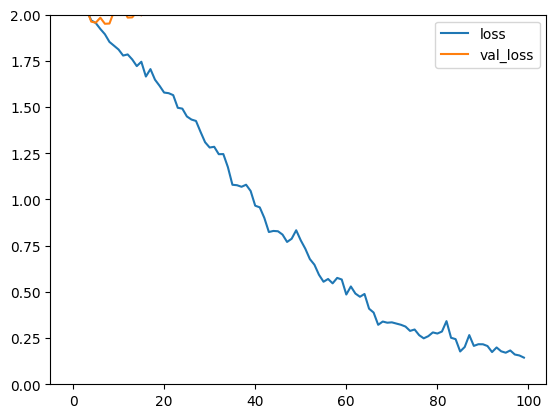

In [20]:
result[['loss','val_loss']].plot(ylim=[0, 2])

<Axes: >

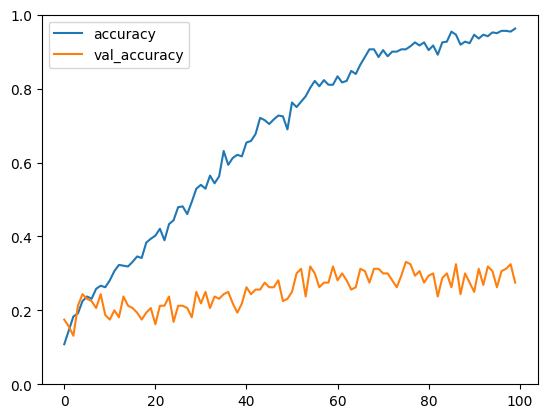

In [21]:
result[['accuracy', 'val_accuracy']].plot(ylim=[0, 1])

In [18]:
model.evaluate(test_generator)

2/2 [==============================] - 0s 357ms/step - loss: 1.9122 - accuracy: 0.3009


[1.9122285842895508, 0.30092594027519226]

試行結果のまとめ
*accurayが上がっているのに、val_accuracyが上がらない→ バッチサイズが小さいので、過剰適応していると思われる。
*バッチサイズを適宜大きくし、epochを上げればaccuracyは上げることができると思料。

ここから先は、付随して試行したこと。
generator を使ったものの、実データを見たかった。

In [11]:
y_pred = model.predict(test_generator)

14/14 [==============================] - 0s 10ms/step


In [12]:
y_pred.shape

(216, 8)

In [13]:
y_pred_i = np.argmax(y_pred,axis=1)

In [14]:
y_pred_i

array([2, 3, 3, 2, 3, 5, 7, 3, 7, 5, 2, 2, 0, 3, 1, 4, 6, 2, 2, 5, 3, 2,
       5, 1, 0, 5, 7, 3, 0, 4, 5, 1, 2, 6, 5, 3, 2, 7, 7, 0, 6, 3, 5, 4,
       2, 0, 6, 2, 0, 5, 5, 7, 0, 6, 7, 6, 4, 3, 0, 6, 6, 3, 0, 6, 1, 1,
       5, 2, 0, 0, 5, 5, 7, 3, 5, 1, 7, 5, 7, 2, 5, 6, 5, 5, 2, 6, 6, 0,
       6, 5, 3, 7, 5, 1, 6, 7, 5, 7, 5, 5, 0, 5, 7, 6, 3, 7, 7, 3, 7, 7,
       5, 1, 7, 2, 1, 1, 7, 1, 4, 5, 2, 3, 5, 1, 6, 7, 2, 5, 6, 5, 3, 1,
       0, 0, 7, 7, 5, 0, 0, 7, 5, 7, 7, 7, 7, 4, 2, 4, 5, 0, 3, 7, 5, 5,
       5, 2, 7, 7, 6, 2, 2, 6, 5, 4, 1, 1, 5, 6, 5, 7, 2, 2, 6, 4, 2, 0,
       2, 7, 4, 5, 3, 4, 7, 5, 0, 5, 7, 0, 1, 0, 3, 7, 7, 7, 3, 7, 2, 0,
       5, 1, 3, 6, 6, 6, 5, 0, 6, 2, 7, 0, 0, 7, 5, 4, 1, 5])

↑　y_predはgeneratorで任意抽出されたinputに対して予測値を返しているようである

↓　test_generatorで作成されたデータのラベルを確認

In [15]:
y_test_label = test_generator.classes

In [94]:
y_test_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int32)

↑　y_testは、generatorで抽出前のようである。

よって、以下の手順では、誤った値となる

In [16]:
print(y_pred_i.shape)
print(y_test_label.shape)

(216,)
(216,)


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test_label,y_pred_i))

              precision    recall  f1-score   support

           0       0.12      0.11      0.12        27
           1       0.00      0.00      0.00        27
           2       0.12      0.11      0.11        27
           3       0.15      0.19      0.17        27
           4       0.32      0.33      0.33        27
           5       0.06      0.11      0.08        27
           6       0.23      0.19      0.20        27
           7       0.10      0.07      0.08        27

    accuracy                           0.14       216
   macro avg       0.14      0.14      0.14       216
weighted avg       0.14      0.14      0.14       216

